# Embedded Syestem Assignment - Power Measurement of a UWB Embedded Platform


## Introduction
In this workbook I will explain a method to measure te power comsumption of an embedded system, in this example we used a Low-power board for Ultra Wide Band (UWB) based on DWM1001 module.

## Environment setup
To measure the power com

# Python execution

TODO:
 - [ ] Theory
 - [ ] Controlling lables
 - [ ] Managing multiple files

##**Before executing the notebook**
1. Upload the oscilloscope output files under lateral filesystem menù
2. Define under here the number of files you have uploaded or you want to take in consideration during calculus
> Note: the file names should be in `data-ok_<number of the file>.csv` format
3. Define the value of the $R_{sense}$ used for mesurement in $\Omega$




In [ ]:
Vdd = 3.3
filesNumber = 7
Rsense = 1
debug = False
# debug = True


# Define Channles Usage
if debug == False:
  functions = {
      'Vdd_CH':    'Channel C (V)',
      'Vsense_CH': 'Channel B (V)',
      'GPIO13_CH': 'Channel D (V)',
      'GPIO23_CH': 'Channel A (V)'
  }
  
else:
  functions = {
      'Vdd_CH':    'Channel A (V)',
      'Vsense_CH': 'Channel B (V)',
      'GPIO13_CH': 'Channel D (V)',
      'GPIO23_CH': 'Channel C (V)'
  }

# Find channel for function:
def get_channel(function_name):
    return functions.get(function_name)


##Importing libraries


In [ ]:
import pandas as pd
import numpy as np
from scipy.integrate import cumulative_trapezoid
import seaborn as sns
from matplotlib import pyplot as plt
import math

sns.set_style("whitegrid")
# sns.set(rc={'figure.figsize':(11,7)})

##Creating DataFrames


In [ ]:
# # Read the first two lines (headers)
if debug == False:
  header = pd.read_csv("data-ok_1.csv", nrows=2)
  # Read the dataset
  df = pd.read_csv("data-ok_1.csv", skiprows=2)
else:
  # Read the first two lines (headers)
  header = pd.read_csv("data1.csv", nrows=2)
  # Read the dataset
  df = pd.read_csv("data1.csv", skiprows=2)

# Create new cols name by inserting de um into the name
new_columns = [
    f"{col} {unit}" for col, unit in zip(header.columns, header.iloc[0])
]

# Renaming dataset column names
df.columns = new_columns
df.info()

# Ceil time culomn
df['Time_ceil (s)'] = np.floor(df['Time (s)'] * 10000) / 10000
df.head()

print(np.floor(df['Time (s)'] * 10000) / 10000)

# Convert to float64 and drop NaN
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df = df[['Time (s)', 'Time_ceil (s)', 'Channel A (V)', 'Channel B (V)', 'Channel C (V)', 'Channel D (V)']]
df.info()
df['Time_ceil (s)']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Time (s)         100001 non-null  float64
 1   Channel A (V)    100001 non-null  float64
 2   Channel B (V)    100001 non-null  float64
 3   Channel C (V)    100001 non-null  float64
 4   Channel D (V)    100001 non-null  float64
 5   Channel D8 (V)   100001 non-null  float64
 6   Channel D9 (V)   100001 non-null  float64
 7   Channel D10 (V)  100001 non-null  float64
 8   Channel D11 (V)  100001 non-null  float64
 9   Channel D12 (V)  100001 non-null  float64
 10  Channel D13 (V)  100001 non-null  float64
 11  Channel D14 (V)  100001 non-null  float64
 12  Channel D15 (V)  100001 non-null  float64
 13  B-C (V)          100001 non-null  float64
dtypes: float64(14)
memory usage: 10.7 MB
0        -0.2001
1        -0.2000
2        -0.1999
3        -0.1998
4        -0.1997
          

,Time_ceil (s)
0,-0.2001
1,-0.2000
2,-0.1999
3,-0.1998
4,-0.1997
...,...
99996,9.7994
99997,9.7995
99998,9.7996
99999,9.7997


##Data Analisys

### Row plot

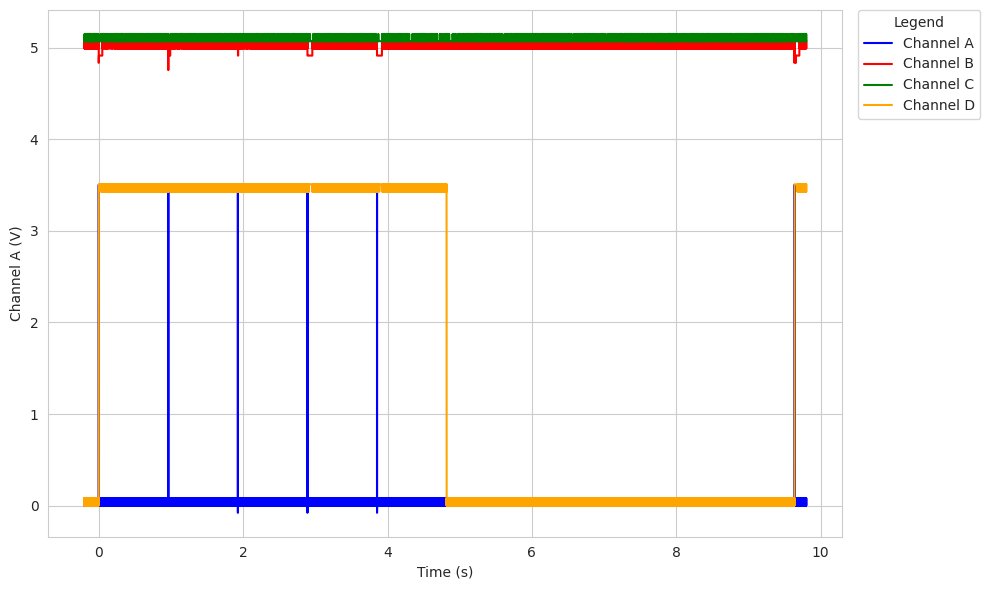

In [ ]:
# Creating Axex and figure
fig, ax = plt.subplots(figsize=(10, 6))

# Row plot
sns.lineplot(data=df, x='Time (s)', y='Channel A (V)', ax= ax, label = "Channel A", color = 'blue')
sns.lineplot(data=df, x='Time (s)', y='Channel B (V)', ax= ax, label = "Channel B", color = 'red')
sns.lineplot(data=df, x='Time (s)', y='Channel C (V)', ax= ax, label = "Channel C", color = 'green')
sns.lineplot(data=df, x='Time (s)', y='Channel D (V)', ax= ax, label = "Channel D",color = 'orange')

# Set legend position in on right side (off of the chart)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Legend', bbox_to_anchor=(1.02, 1), loc='upper left',borderaxespad=0.)
plt.tight_layout()

# Plot
plt.show()


### Plot signal names

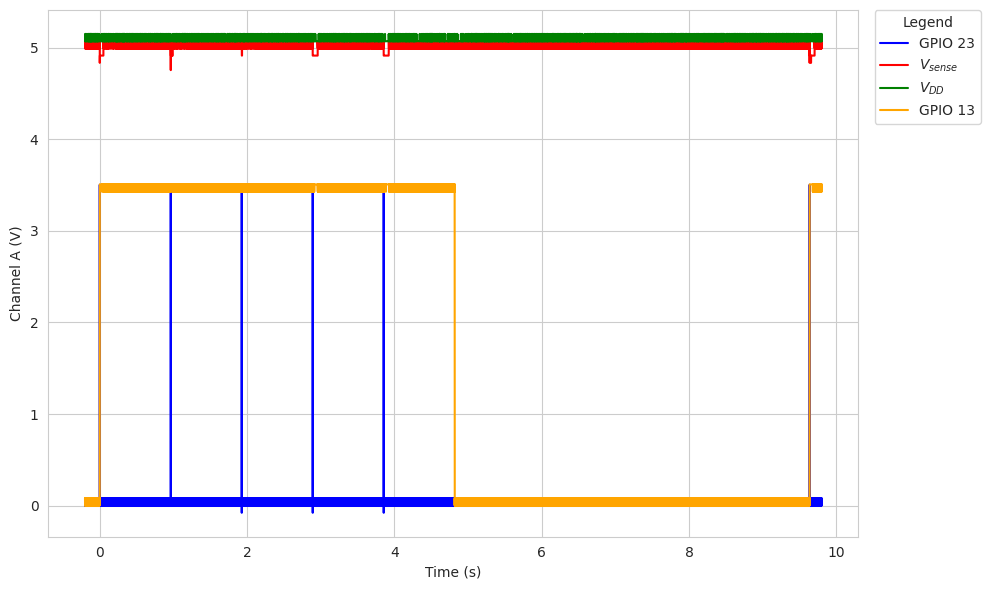

In [ ]:
# Creating Axex and figure
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(data=df, x='Time (s)', y=get_channel('GPIO23_CH'), ax= ax, label = "GPIO 23", color = 'blue')
sns.lineplot(data=df, x='Time (s)', y=get_channel('Vsense_CH'), ax= ax, label = "$V_{sense}$", color = 'red')
sns.lineplot(data=df, x='Time (s)', y=get_channel('Vdd_CH'), ax= ax, label = "$V_{DD}$", color = 'green')
sns.lineplot(data=df, x='Time (s)', y=get_channel('GPIO13_CH'), ax= ax, label = "GPIO 13",color = 'orange')

# Set legend position in on right side (off of the chart)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Legend', bbox_to_anchor=(1.02, 1), loc='upper left',borderaxespad=0.)
plt.tight_layout()

# Plot
plt.show()

### Calculating Current and Power

Mean Power: 376.7150584489101 mW
Std Power: 151.97477128772945 mW


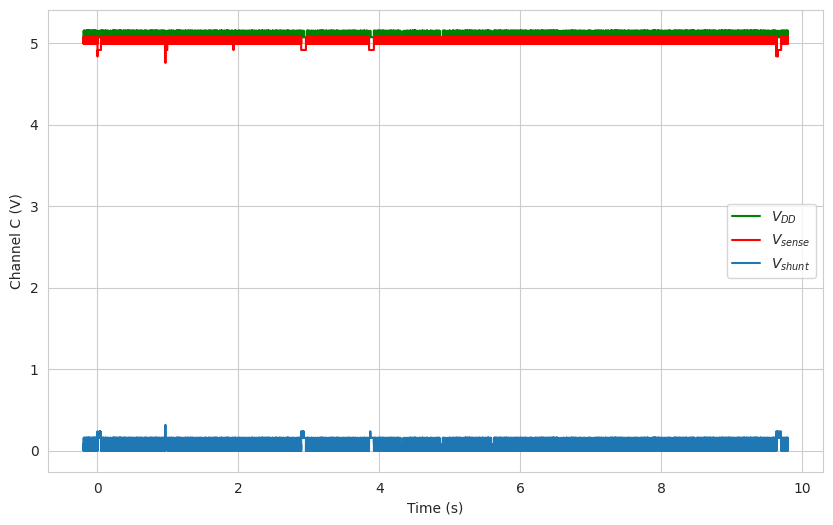

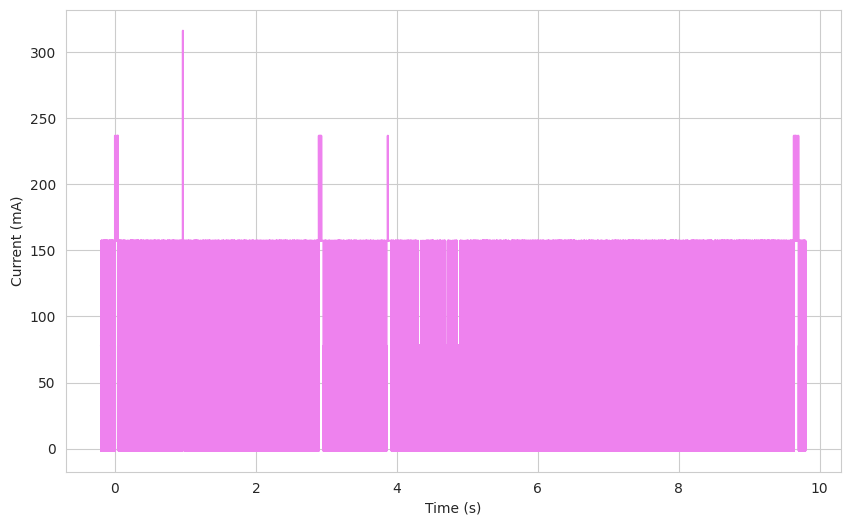

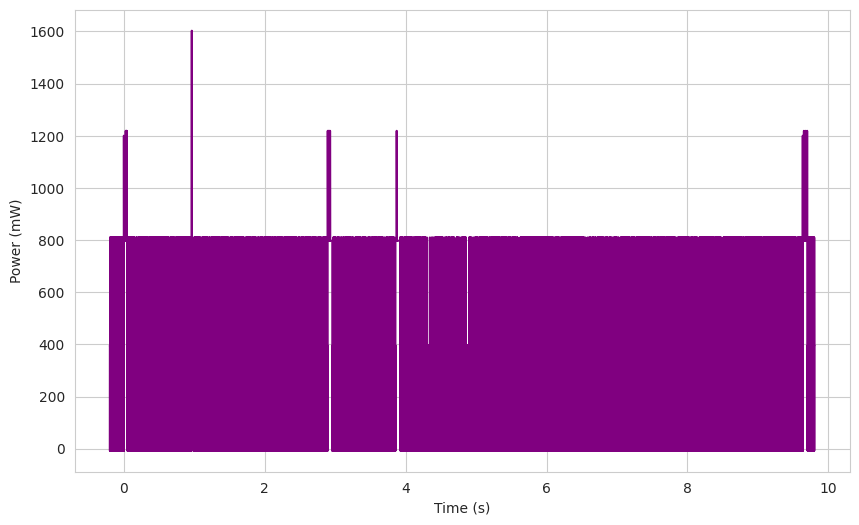

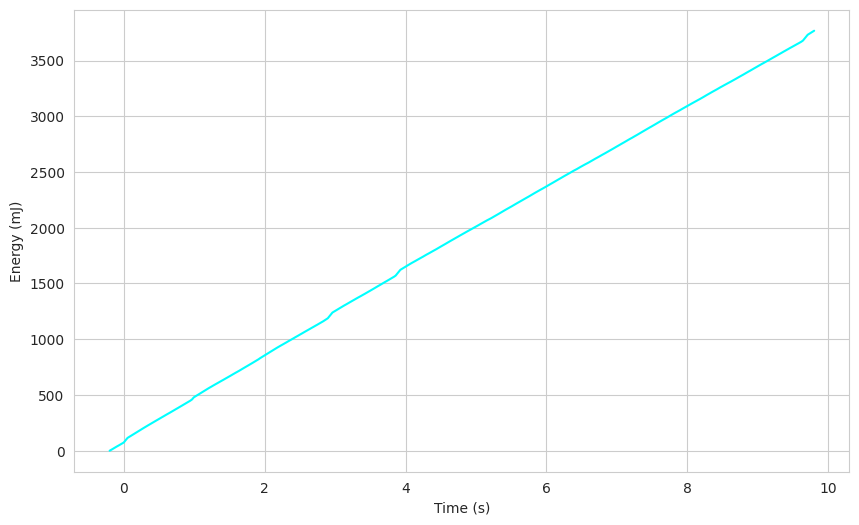

In [ ]:
# Calculating the voltage drop over Rsense
df['Shunt Voltage (V)'] = df[get_channel('Vdd_CH')] - df[get_channel('Vsense_CH')]

# Calculating the current drowned by the system
df['Current (mA)'] = ((df[get_channel('Vdd_CH')] - df[get_channel('Vsense_CH')]) / Rsense )* 1000

# Calculating the power consumption of the wole system (shunt included)
df['Power (mW)'] = df['Current (mA)'] * df['Channel C (V)']

# Calculating the energy
df["Energy (mJ)"] = cumulative_trapezoid(df["Power (mW)"], x=df["Time (s)"], initial=0)

# Calculating mean and std of the wole application
powerTaskMean = df['Power (mW)'].mean()
powerTaskStd = df['Power (mW)'].std()
print(f"Mean Power: {powerTaskMean} mW")
print(f"Std Power: {powerTaskStd} mW")

#Plot Voltages over time
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df, x='Time (s)', y=get_channel('Vdd_CH'), ax= ax, label = "$V_{DD}$", color = 'green')
sns.lineplot(data=df, x='Time (s)', y=get_channel('Vsense_CH'), ax= ax, label = "$V_{sense}$", color = 'red')
sns.lineplot(data=df, x='Time (s)', y='Shunt Voltage (V)', ax= ax, label = "$V_{shunt}$")
plt.show()

# Plot the current over time
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df, x='Time (s)', y='Current (mA)', ax=ax, color = 'violet')
plt.show()

# Plot the power over time
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df, x='Time (s)', y='Power (mW)', ax=ax, color = 'purple')
plt.show()

# Plot energy over time
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df, x='Time (s)', y='Energy (mJ)', ax=ax, color = 'cyan')
plt.show()


In [ ]:
# Defining a trunc function
def trunc(n):
  return int(n * 10000) / 10000.0

#Transmit Mean Power
dfTx = df[(df[get_channel('GPIO13_CH')] > Vdd/2) & (df[get_channel('GPIO23_CH')] > Vdd/2) & (df['Time (s)'] < 6)]
powerTxMean = dfTx['Power (mW)'].mean()
powerTxStd = dfTx['Power (mW)'].std()

print(f"Mean TX Power: {powerTxMean} mW")
print(f"Std TX Power: {powerTxStd} mW")

#Idle Mean Power
dfIdle = df[(df[get_channel('GPIO13_CH')] > Vdd/2) & (df[get_channel('GPIO23_CH')] < Vdd/2) & (df['Time (s)'] < 6)]
powerIdleMean = dfIdle['Power (mW)'].mean()
powerIdleStd = dfIdle['Power (mW)'].std()

print(f"Mean Idle Power: {powerIdleMean} mW")
print(f"Std Idle Power: {powerIdleStd} mW")

# Chunc energy array
txEnergyArr = []
txChunks = 0
txItemTime = dfTx.iloc[0, dfTx.columns.get_loc('Time (s)')]
txEnergy0 = dfTx.iloc[0, dfTx.columns.get_loc('Energy (mJ)')]
print( len (dfTx))
for i in range(1, len(dfTx)):
  timeDiff = dfTx.iloc[i, dfTx.columns.get_loc('Time_ceil (s)')] - txItemTime
  txEnergy = dfTx.iloc[i - 1, dfTx.columns.get_loc('Energy (mJ)')] - txEnergy0
  energyA = dfTx.iloc[i, dfTx.columns.get_loc('Energy (mJ)')]
  if i == len(dfTx) - 1:
    txEnergyArr.append(dfTx.iloc[i, dfTx.columns.get_loc('Energy (mJ)')] - txEnergy0)
    txChunks += 1
  elif trunc(timeDiff) > 0.0001 and i != len(dfTx):
    txChunks += 1
    txEnergyArr.append(txEnergy)
    txEnergy0 = dfTx.iloc[i, dfTx.columns.get_loc('Energy (mJ)')]
    print(f"Chunk: {txChunks}, index {i}, time was {txItemTime}, energy was {txEnergy}, txEnergy0: {txEnergy0}, energyA: {energyA}, timediff:{timeDiff}")

  txItemTime = dfTx.iloc[i , dfTx.columns.get_loc('Time_ceil (s)')]

print(f"Total TX Chunks: {txChunks}")
print(txEnergyArr)

#
dfTx['ID'] = range(len(dfTx))
# dfTx[['ID', 'Time (s)', 'Power (mW)', get_channel('GPIO23_CH')]]
# dfTx[['ID', 'Time_ceil (s)', 'Power (mW)', 'Energy (mJ)']]
# dfIdle[['Time (s)', 'Power (mW)', get_channel('GPIO23_CH')]]

# df[df[get_channel('GPIO13_CH')] > Vdd/2][['Time (s)', 'Power (mW)', get_channel('GPIO23_CH')]]

Mean TX Power: 583.1036919490213 mW
Std TX Power: 335.4568768056152 mW
Mean Idle Power: 388.69743405700405 mW
Std Idle Power: 151.71582779929454 mW
15
Chunk: 1, index 3, time was 0.0005, energy was 0.13935286155525262, txEnergy0: 455.8269123584186, energyA: 455.8269123584186, timediff:0.9634
Chunk: 2, index 6, time was 0.9641, energy was 0.1195312616399633, txEnergy0: 825.3047868743555, energyA: 825.3047868743555, timediff:0.9633
Chunk: 3, index 9, time was 1.9276, energy was 0.11922249869098778, txEnergy0: 1183.8736582312729, energyA: 1183.8736582312729, timediff:0.9634
Chunk: 4, index 12, time was 2.8912, energy was 0.11922249869098778, txEnergy0: 1566.9203193550793, energyA: 1566.9203193550793, timediff:0.9634
Total TX Chunks: 5
[np.float64(0.13935286155525262), np.float64(0.1195312616399633), np.float64(0.11922249869098778), np.float64(0.11922249869098778), np.float64(0.11922249869098778)]


/tmp/ipython-input-3428999315.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTx['ID'] = range(len(dfTx))


In [ ]:
# Cycle on all the time points
# meanTxPower = 0
# txEnergy = 0
# txSamples = 0

# meanRxPower = 0
# rxEnergy = 0
# rxSamples = 0

# meanIdlePower = 0
# idleEnergy = 0
# idleSamples = 0

# meanPower = 0
# totalEnergy = 0


# dt = abs( df.iloc[1, df.columns.get_loc('Time (s)')] - df.iloc[0, df.columns.get_loc('Time (s)')])

# i = 0
# for i in range(0, len(df)):
#   totalEnergy += df.iloc[i, df.columns.get_loc('Power (mW)')] * dt
#   meanPower += df.iloc[i, df.columns.get_loc('Power (mW)')]
#   # Not in IDLE
#   if df.iloc[i, df.columns.get_loc(get_channel('GPIO13_CH'))] > Vdd/2 :
#     if df.iloc[i, df.columns.get_loc(get_channel('GPIO23_CH'))] > Vdd/2:
#       # Computing the Transmitting Power and Energy
#       txSamples += 1
#       txEnergy += df.iloc[i, df.columns.get_loc('Power (mW)')] * dt
#       meanTxPower += df.iloc[i, df.columns.get_loc('Power (mW)')]
#     else:
#       # Computing the Transmitting Power and Energy
#       rxSamples += 1
#       rxEnergy += df.iloc[i, df.columns.get_loc('Power (mW)')] * dt
#       meanRxPower += df.iloc[i, df.columns.get_loc('Power (mW)')]
#   else:
#     # Computing the IDLE Power and Energy
#     idleSamples += 1
#     idleEnergy += df.iloc[i, df.columns.get_loc('Power (mW)')] * dt
#     meanIdlePower += df.iloc[i, df.columns.get_loc('Power (mW)')]

# meanTxPower /= txSamples
# meanRxPower /= rxSamples
# meanIdlePower /= idleSamples
# meanPower /= len(df)

# print(f"Mean Transmitting Power: {meanTxPower} mW")
# print(f"Mean Idle Power: {meanRxPower} mW")
# # print(f"Mean Idle Power: {meanIdlePower} mW")
# print(f"Mean Power: {meanPower} mW")


# print(f"Total Transmitting Energy: {txEnergy} mJ")
# print(f"Total Idle Energy: {rxEnergy} mJ")
# # print(f"Total Idle Energy: {idleEnergy} mJ")
# print(f"Total Energy: {totalEnergy} mJ")

# print(f"\nTotal Transmitting Samples: {txSamples}")
# print(f"Total Idle Samples: {rxSamples}")
# # print(f"Total Idle Samples: {idleSamples}")


